In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline


# 1. Visualization

import all the data

In [12]:
data_dir="C:\\Users\\hasee\\workspace\\Kaggle\\voice_detection\\train\\audio\\"
os.listdir(data_dir)

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

## 1.1 Wave and Spectrogram

In [2]:
file_path="C:\\Users\\hasee\\workspace\\Kaggle\\voice_detection\\train\\audio"
file_name="\\dog\\00b01445_nohash_0.wav"
sample_rate, samples = wavfile.read(file_path + file_name)

In [4]:
sample_rate

16000

In [5]:
ipd.Audio(samples,rate=sample_rate)

let us calculate spectrogram and apply the logrithm on the spectrogram, because it is much more **clear** and **strict connected with human hearing**, but before we should make sure there is no 0 before logrithm

In [6]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3)) #round() si she wu ru 
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times , spec

In [7]:
freqs,times,spec=log_specgram(samples,sample_rate)

In [8]:
spec=np.log(spec.T.astype(np.float64)+1e-10)
spec

array([[ -8.49241802,  -3.18236696,   1.25287556, ..., -10.60774994,
        -10.7259588 , -11.52528649],
       [ -5.30067714,  -1.73961784,   1.73165286, ..., -14.57665388,
        -12.36912607, -12.92873979],
       [ -6.19468813,  -1.45794211,   2.09895625, ..., -11.03282158,
        -11.89671068, -14.74633398],
       ..., 
       [-11.78859135,   0.15294492,   3.13888371, ..., -13.91186263,
        -11.30378402, -10.87728358],
       [ -3.68740843,  -0.38951631,   3.00682593, ..., -12.88089933,
        -13.64625965, -12.04560709],
       [ -6.65854115,  -1.4011146 ,   2.79793239, ..., -12.96883389,
        -12.13577608, -11.57916797]])

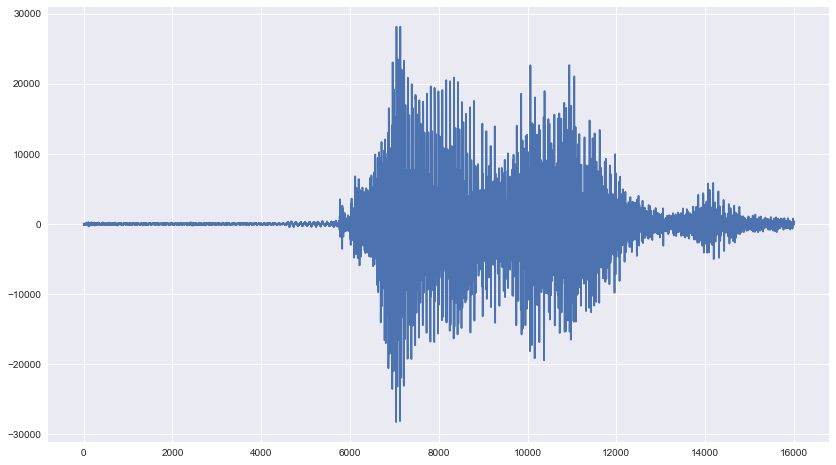

In [9]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0, len(samples), len(samples)), samples)
plt.show()

 if we want to input the spectrogram as 

## 1.2 MFCC

we shall use the sophisticate features MFCC as the inputs of NN